#2.4 Convolutional Neural Networks in Keras
Convolutional Neural Network (CNN) are very popular architecture in the field of computervision.  This deep network architecture performs very well in areas such as image classification, image recognition and object detection. The architecture is designed to take advantage of the 2D structure of the input data such as image or a speech signal.

In this tutorial we will use a very well known dataset called** Fashion Mnist** .Normally , **MNIST**-which consist ten different classes of hand written digits- is the starting point for many initial CNN learners. But we have chosen this dataset,which consist of ten different classes fashion items like clothes, shoes, bags etc, as MNIST has become very easy and over used dataset.  Some of the instances of the data are shown in figure given below:


![ Fig: Fashion MNIST ](https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

*Figure: Samples of Fashion MNIST dataset*

##2.4.1 Data Preparation
We can start by downloading the data set . The data set is available at keras server. It consists of 60000 grayscale images of size 28*28 as training set and  10000 test images with total 10 classes. The data is stored as numpy array so we can check this detail using shape property of the array.



In [38]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print("Training data detail:", x_train.shape)
print("Test data detail:", x_test.shape)


Training data detail: (60000, 28, 28)
Test data detail: (10000, 28, 28)


We can also inspect each element of our data set. Here we will check 11th image of our training data set. 

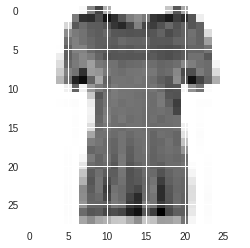

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[10])

Before we can use our data , we need to convert our 3 dimensional data to 4 dimensional data to make it compatible with Keras. We achieve this by using numpy reshape function. We perform this action to both train and test data.

In [0]:
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0],img_rows, img_cols,1)


We will also have to normalize our data to get better result. Since we are using grayscale image , we can normalize our image by dividing it by 255. This restricts the pixel value from 0 to 1 resulting in better performance.

In [4]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


We will also need to convert our target values into one hot encoding like we did in our earlier chapter.

In [0]:
import keras 
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

##2.4.2 Model Building
After preparing our data , we now need to build our cnn architecture. A CNN network is composed of different layers like convolutional layer, pooling layer, dense layer and other as shown in figure. We will import this from keras layers class. We will also need to flatten the results of convolutional layer before feeding it to dense layer. For this purpose we will use Flatten class . We will also use Dropout for regularization.

![Figure CNN layer](https://www.jeremyjordan.me/content/images/2018/04/vgg16.png)

*Figure : Convolutional Neural Network Architecture*

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D



We will start by creating an instance of Sequential class and add required layers step by step.

In [0]:
  model = Sequential()


We will now add our first convolutional layer which has input shape of our image. It will use 32 layers of 3*3 kernels. We will the use** relu**  as our activation function.

In [0]:
input_shape = (img_rows, img_cols,1)
model.add(Conv2D(32, kernel_size=(3, 3),
                   activation='relu',
                   input_shape=input_shape))

We wil add another convolutional layer which uses 64 layers of 3*3 kernel . We will use the same activation function as the previous layer

In [0]:
  model.add(Conv2D(64, (3, 3), activation='relu'))


We will now use max pooling layer of size 2*2 to reduce spatial size of our feature map.
We will also use drop out of 25% which mean 25% of neuron used upto that points are randomly dropped. This prevents our CNN model from overfitting.

In [0]:
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

The dense layer takes input as a 1D vector but the output from convolutional layer ar multi-dimensional. So we flatten our feature map provided from our convolutional layer. We will feed this flattened layer to a dense layer of 128 neurons.The layer will be followed by **relu** activation function We will also add a dropout after the dense layer.



In [0]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

We will then add our final layer which is also a dense layer. But we should be careful about choosing the total number of neurons in this layer. We need to make the number of neurons equals to to total number of classes as we will use softmax function which will predict the probability of given example falling into particular class.



In [0]:
model.add(Dense(num_classes, activation='softmax'))


We have successfully created our CNN architecture which consists of two convolutional layers and two dense layers. In keras, as we have done in earlier chapter, we  have to complile our model  before training it. While compiling , we will set categorical cross entropy as our loss function Adadelta as our optimizer and we will measure performance of our model using **accuracy **matric.

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

For simplification ( and also for reusing code in different part of our chapter) we will create a function called CNN which will build a model we described above.

In [0]:
num_classes = 10

def CNN():

  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                   activation='relu',
                   input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  
  model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
  
  return model

We can see the output size of different layers of our model using model summary fuction. We can see that our model have about 2 million parameters.

In [30]:
model_no_aug = CNN()
print(model_no_aug.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

##2.4.3 Training and Testing

###2.4.3.1 Training without data augmentation
In this chapter we will firstly explore to train our model only in our data. Then we will explore how it will behave with data augmentation.

In [0]:
batch_size = 32
epochs = 12

In [32]:
model_no_aug.fit(x_train, y_train,validation_split=0.1,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/12
54000/54000 [==============================] - 19s 354us/step - loss: 0.4866 - acc: 0.8283 - val_loss: 0.3185 - val_acc: 0.8773
Epoch 2/12
54000/54000 [==============================] - 19s 344us/step - loss: 0.3207 - acc: 0.8879 - val_loss: 0.2533 - val_acc: 0.9105
Epoch 3/12
54000/54000 [==============================] - 19s 343us/step - loss: 0.2735 - acc: 0.9028 - val_loss: 0.2382 - val_acc: 0.9140
Epoch 4/12
54000/54000 [==============================] - 18s 342us/step - loss: 0.2506 - acc: 0.9126 - val_loss: 0.2464 - val_acc: 0.9102
Epoch 5/12
54000/54000 [==============================] - 18s 341us/step - loss: 0.2340 - acc: 0.9192 - val_loss: 0.2508 - val_acc: 0.9178
Epoch 6/12
54000/54000 [==============================] - 18s 342us/step - loss: 0.2231 - acc: 0.9229 - val_loss: 0.2168 - val_acc: 0.9215
Epoch 7/12
54000/54000 [==============================] - 18s 342us/step - loss: 0.2130 - acc: 0.9268 - val_loss: 0.2

In [33]:
score = model_no_aug.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.24024140211939812
Test accuracy: 0.9191


###2.4.3.2 Training with data augmentation

Data augmentation comes handy when we have very few data or when our model is over-fitting. To mimic the scenario of lack of data we will use the first 1000 images and train our model as previously.

In [0]:
x_train = x_train[:999]
y_train = y_train[:999]

model = CNN()

model.fit(x_train, y_train,validation_split=0.1,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 899 samples, validate on 100 samples
Epoch 1/12
899/899 [==============================] - 1s 1ms/step - loss: 1.7337 - acc: 0.4149 - val_loss: 1.9373 - val_acc: 0.3900
Epoch 2/12
899/899 [==============================] - 0s 353us/step - loss: 0.9652 - acc: 0.6574 - val_loss: 0.8540 - val_acc: 0.7200
Epoch 3/12
899/899 [==============================] - 0s 362us/step - loss: 0.7488 - acc: 0.7564 - val_loss: 0.6538 - val_acc: 0.7900
Epoch 4/12
899/899 [==============================] - 0s 362us/step - loss: 0.6105 - acc: 0.7831 - val_loss: 0.6577 - val_acc: 0.7800
Epoch 5/12
899/899 [==============================] - 0s 357us/step - loss: 0.5668 - acc: 0.8209 - val_loss: 0.4960 - val_acc: 0.8000
Epoch 6/12
899/899 [==============================] - 0s 359us/step - loss: 0.4937 - acc: 0.8220 - val_loss: 0.5983 - val_acc: 0.7900
Epoch 7/12
899/899 [==============================] - 0s 362us/step - loss: 0.4749 - acc: 0.8398 - val_loss: 0.4777 - val_acc: 0.8600
Epoch 8/12
899/899

With lack of data we clearly see how our model performance has degraded. While we have achieved accuracy of above 91% with 60000 thaousand train data, our model performance has now come down to about 79% accuracy. The case may be even worse with other more complicated task.

###2.4.3.2 Training with data augmentation
Augmenting image data is very easy in Keras. We will use ImageDataGenerator class of keras to carryout different image augmentation. Here we have instatntiate an ImageDataGenerator object which will carry out image augmentation methods like rotation, image shifting and flipping. 

In [0]:
from keras.preprocessing.image import ImageDataGenerator

x_train = x_train[:999]
y_train = y_train[:999]
epochs = 12

model = CNN()
image_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True)

#training the image preprocessing
image_gen.fit(x_train, augment=True)

Unlike our previous approach, when we have directly fed our image to our model , we will now have to feed our ImageDataGenerator object which will produce new set of images with different combination of data augmentation while training . To make this happen the fit function that we previously used won't be helpful. We ,thus, use a function called fit_generator. With the data augmentation technique implemented , we can clearly see our model performing better than than without using it.

In [0]:
model.fit_generator(image_gen.flow(x_train, y_train, batch_size=batch_size),
          steps_per_epoch=  x_train.shape[0],
          epochs=epochs,
          verbose=1)

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
999/999 [==============================] - 17s 17ms/step - loss: 0.9379 - acc: 0.6534
Epoch 2/12
999/999 [==============================] - 16s 16ms/step - loss: 0.6399 - acc: 0.7671
Epoch 3/12
999/999 [==============================] - 16s 16ms/step - loss: 0.5483 - acc: 0.8010
Epoch 4/12
999/999 [==============================] - 16s 16ms/step - loss: 0.4957 - acc: 0.8194
Epoch 5/12
999/999 [==============================] - 16s 16ms/step - loss: 0.4490 - acc: 0.8356
Epoch 6/12
999/999 [==============================] - 16s 16ms/step - loss: 0.4189 - acc: 0.8475
Epoch 7/12
999/999 [==============================] - 16s 16ms/step - loss: 0.3889 - acc: 0.8599
Epoch 8/12
999/999 [==============================] - 16s 16ms/step - loss: 0.3751 - acc: 0.8663
Epoch 9/12
999/999 [==============================] - 16s 16ms/step - loss: 0.3579 - acc: 0.8719
Epoch 10/12
999/999 [==============================] - 16s 16ms/step - loss: 0.3430 - acc: 0.8771
Epoch 11/12
999/999 [========

##2.4.4 What did our model learn?

"Visualizing intermediate activations consists of displaying the feature maps that are output by various convolution and pooling layers in a network, given a certain input (the output of a layer is often called its activation, the output of the activation function). This gives a view into how an input is decomposed into the different filters learned by the network. Each channel encodes relatively independent features, so the proper way to visualize these feature maps is by independently plotting the contents of every channel as a 2D image"  says François Chollet, author of keras. 
Knowing how different layer are learning from our data is very helpful to get insight on how deep learning works. It help us understand how these successive layers are transforming their input.. So we will be using our **model_no_aug** model -,which was trained with all data with out data augmentation, to visualize how its layers are learning from our images. We will start by making list of all the layers of our model.

In [0]:
layer_outputs = [layer.output for layer in model_no_aug.layers] 


We will now create activation models from the layers of our model using keras class Model. We feed it image input while it returns the values of layer of activation. Since we have multiple layers, we create a multi-output model which can take many input and many output. 

In [0]:
from keras import models

activation_model = models.Model(inputs=model_no_aug.input, outputs=layer_outputs)

Now will use second image from our training dataset to find out how our layers are behaving. Our second image is a t-shirt which we can see below.

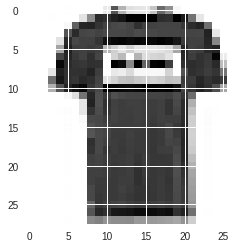

In [42]:
plt.imshow(x_train[1])

We will now use our activation model to make prediction on our image. As this is a multi-modal layer , it gives result for all of our layers. We will what our first convolutional layer has learned.

In [0]:
x = x_train[1].reshape(1,28,28,1)

activations = activation_model.predict(x) 

first_layer_activation = activations[0]


It seems  like our first layer has sucessfuly encode a virtical edge detector. In the plot below, we can clearly see that the vertical lines of our t-sirt is being activated (observed from bright color)

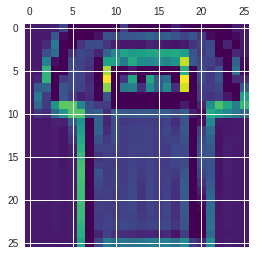

In [37]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')


You can similarly inspect other layers and find out what our layers has learned. While doing so, you will find out that different layers learn different things and as we go higher , what layer learns become more abstract and less interpretable. Which means our model starts by learning simple feature and eands up learning complex features which it later uses to make predictions.